In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## GridSearch 결과 가져오기

In [2]:
### grid parameters

Kenel_S = [3.0,5.0]
Dense_N = [12, 18, 21, 24]
Learn_R = [0.01,0.001,0.005]
Stride_S = [1.0,2.0,3.0]

n_comb = len(Kenel_S)*len(Dense_N)*len(Learn_R)*len(Stride_S)
print('조합 갯수:{}'.format(n_comb))

조합 갯수:72


In [3]:
pd.set_option('display.max_rows',200)

In [4]:
cv_results = pd.read_csv('./Training_result.csv')
cv_results

,Case,Kernel_S,Dense_N,Learn_R,Stride_S,Accuracy
0,0.0,3.0,12.0,0.010,1.0,1.000
1,1.0,3.0,12.0,0.010,2.0,0.500
2,2.0,3.0,12.0,0.010,3.0,0.850
3,3.0,3.0,12.0,0.001,1.0,0.500
4,4.0,3.0,12.0,0.001,2.0,1.000
5,5.0,3.0,12.0,0.001,3.0,0.975
6,6.0,3.0,12.0,0.005,1.0,0.975
7,7.0,3.0,12.0,0.005,2.0,1.000
8,8.0,3.0,12.0,0.005,3.0,0.800
9,9.0,3.0,18.0,0.010,1.0,0.975


In [5]:
cv_results=cv_results.sort_values(by='Accuracy',ascending=False).copy()
cv_results

,Case,Kernel_S,Dense_N,Learn_R,Stride_S,Accuracy
0,0.0,3.0,12.0,0.010,1.0,1.000
59,59.0,4.0,21.0,0.001,3.0,1.000
67,67.0,4.0,24.0,0.001,2.0,1.000
64,64.0,4.0,24.0,0.010,2.0,1.000
63,63.0,4.0,24.0,0.010,1.0,1.000
62,62.0,4.0,21.0,0.005,3.0,1.000
61,61.0,4.0,21.0,0.005,2.0,1.000
60,60.0,4.0,21.0,0.005,1.0,1.000
53,53.0,4.0,18.0,0.005,3.0,1.000
70,70.0,4.0,24.0,0.005,2.0,1.000


In [24]:
df = cv_results.groupby(cv_results['Accuracy'])
df

In [6]:
col_list = cv_results.columns.to_list()
col_list

['Case', 'Kernel_S', 'Dense_N', 'Learn_R', 'Stride_S', 'Accuracy']

### plot 위한 gird search 결과 매트릭스 재배치

In [7]:
# 임의로 잡은 고정 파라미터 ==> 수정 필요시 모든 for문 내에서 수정할것
key_feature = ['Learn_R','Kenel_S'] 

label = pd.DataFrame(columns=key_feature)
cnt = 0
for lr in Learn_R:
    condition_1 = (cv_results['Learn_R'] == lr)
    for ks in Kenel_S:
        condition_2 = (cv_results['Kernel_S'] == ks)
        temp_cv = cv_results[condition_1 & condition_2]
        cv_gridsearch_result = temp_cv.pivot(index='Dense_N', 
                                             columns='Stride_S', 
                                             values='Accuracy').T # 가로에 넣고싶은걸 index
        
        exec('cv_result_{} = cv_gridsearch_result'.format(cnt+1)) # cv_result_1 부터 시작
        cnt += 1
        

In [8]:
cv_result_1

Dense_N,12.0,18.0,21.0,24.0
Stride_S,,,,
1.0,1.00,0.975,0.575,0.55
2.0,0.50,0.550,0.925,0.50
3.0,0.85,0.500,0.700,0.95


In [9]:
cv_result_1.mean().mean()

0.7145833373069762

*********************************************
Learning_rate:0.01
Kernel_Size:3.0
Mean_accuracy:0.715


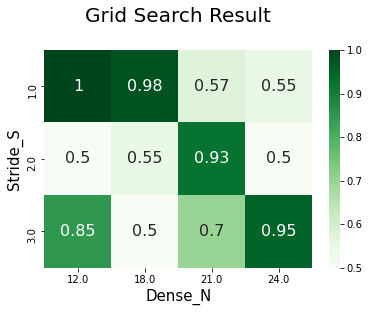

*********************************************
Learning_rate:0.01
Kernel_Size:5.0
Mean_accuracy:0.629


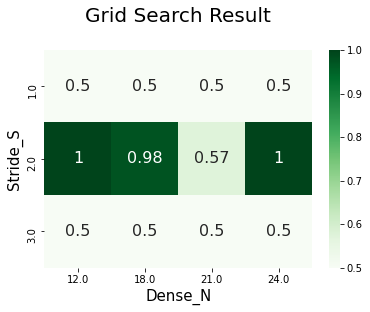

*********************************************
Learning_rate:0.001
Kernel_Size:3.0
Mean_accuracy:0.954


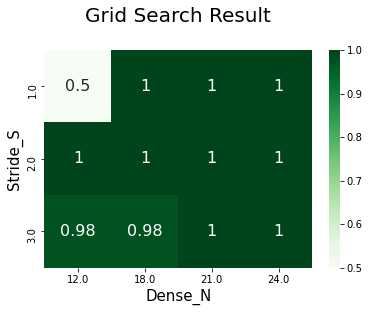

*********************************************
Learning_rate:0.001
Kernel_Size:5.0
Mean_accuracy:0.915


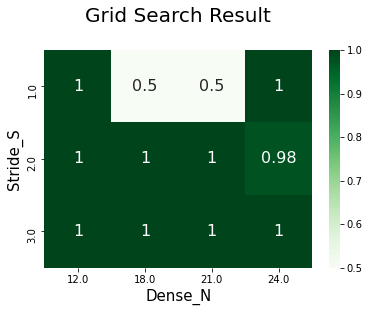

*********************************************
Learning_rate:0.005
Kernel_Size:3.0
Mean_accuracy:0.944


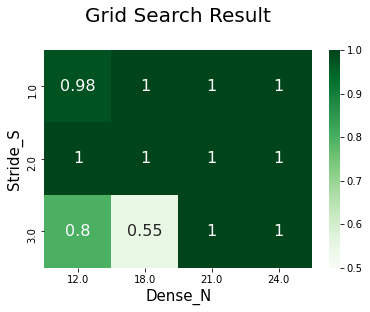

*********************************************
Learning_rate:0.005
Kernel_Size:5.0
Mean_accuracy:0.808


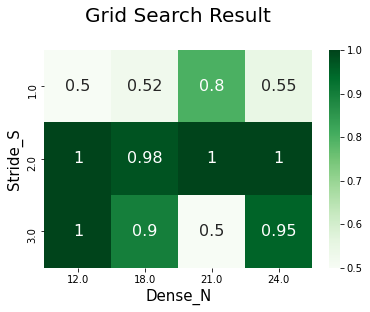

In [10]:
'''돌아가는지 확인필요* 현재 stride가 없어서 모든 cv_result가 비어있음'''
key_feature = ['Learn_R','Kenel_S'] # 임의로 잡은 고정 파라미터 ==> 수정 필요시 모든 for문 내에서 수정할것
cnt = 0
for lr in Learn_R:
    for ks in Kenel_S:
        print('*'*45)
        exec('cv_result = cv_result_{}'.format(cnt+1))
        ax = sns.heatmap(cv_result,
                 annot=True,
                 cmap='Greens',
                 linecolor='white',
                 vmin=0.5, vmax=1,
                 annot_kws={"size": 16})

        ax.set_title('Grid Search Result\n', fontsize=20) # 수정
        ax.set_xlabel('Dense_N', fontsize=15) # 수정
        ax.set_ylabel('Stride_S', fontsize=15) # 수정
        
        print('Learning_rate:{}\nKernel_Size:{}'.format(lr,ks)) # 확인용
        mean_acc = cv_result.mean().mean()
        print('Mean_accuracy:{0:.3f}'.format(mean_acc))

        # plt.savefig('./dcu data MLmodeling/kNN GS result (weight=Dist).png')
        cnt+=1
        plt.show()

.

.

.

.

.

.

### =====================원본=========================

## GridSearch 결과 가져오기

### grid parameters

In [11]:
kNNGridParams = {
    'weights' : ['uniform', 'distance'],
    'n_neighbors' : list(range(3, 20, 2)),
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

In [12]:
C_range = [0.001, 0.01, 0.1, 1, 10]
Gamma_range = [ 0.01, 0.1, 1, 10, 100]

SVMGridParams = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'C' : C_range,
    'gamma' : Gamma_range
}

In [13]:
ANNGridParams = {
    'learningRate' : [0.0001,0.001,0.01,0.1],
    'noOfNeuron' : [2, 4, 8, 16],
    'epochs'  : [500, 2000, 4000]
}

In [14]:
# 정규화 데이터 모델
CV_results_kNN_std = pd.read_csv('./dcu data MLmodeling/CV_results_kNN(std).csv', index_col = 0)[['param_weights', 'param_n_neighbors', 'param_metric', 'mean_test_score']]
CV_results_SVM_std = pd.read_csv('./dcu data MLmodeling/CV_results_SVM(std).csv', index_col = 0)[['param_kernel', 'param_C', 'param_gamma', 'mean_test_score']]
CV_results_ANN_std = pd.read_csv('./dcu data MLmodeling/CV_results_ANN(std).csv', index_col = 0)[['param_epochs','param_learningRate','param_noOfNeuron','mean_test_score']]

# 졍규화 X 데이터 모델
CV_results_kNN = pd.read_csv('./dcu data MLmodeling/CV_results_kNN.csv', index_col = 0)[['param_weights', 'param_n_neighbors', 'param_metric', 'mean_test_score']]
CV_results_SVM = pd.read_csv('./dcu data MLmodeling/CV_results_SVM.csv', index_col = 0)[['param_kernel', 'param_C', 'param_gamma', 'mean_test_score']]
CV_results_ANN = pd.read_csv('./dcu data MLmodeling/CV_results_ANN.csv', index_col = 0)[['param_epochs','param_learningRate','param_noOfNeuron','mean_test_score']]

FileNotFoundError: [Errno 2] No such file or directory: './dcu data MLmodeling/CV_results_kNN(std).csv'

In [ ]:
# 플롯할 순서에 따라 정렬
CV_results_kNN_std = CV_results_kNN_std.sort_values(by = ['param_weights', 'param_n_neighbors', 'param_metric'])
CV_results_SVM_std = CV_results_SVM_std.sort_values(by = ['param_kernel', 'param_C', 'param_gamma'])
CV_results_ANN_std = CV_results_ANN_std.sort_values(by = ['param_epochs', 'param_learningRate', 'param_noOfNeuron'])

### kNN 결과 plot

In [ ]:
W = ['uniform', 'distance']
n_neighbors = list(range(3, 20, 2))
Metric = ['euclidean', 'manhattan', 'minkowski']

CV_results_kNN_std_Dist = CV_results_kNN_std.iloc[:len(n_neighbors)*len(Metric), :]
CV_results_kNN_std_Unif = CV_results_kNN_std.iloc[len(n_neighbors)*len(Metric):, :]

CV_results_kNN_std_Dist_mtx  = CV_results_kNN_std_Dist.pivot(index='param_n_neighbors', columns='param_metric', values='mean_test_score').T
CV_results_kNN_std_Unif_mtx  = CV_results_kNN_std_Unif.pivot(index='param_n_neighbors', columns='param_metric', values='mean_test_score').T

CV_results_kNN_std_Dist_mtx

In [ ]:
fix, ax = plt.subplots(figsize=(9, 6))

ax = sns.heatmap(CV_results_kNN_std_Dist_mtx,
                 annot=True,
                 cmap='Greens',
                 linecolor='white',
                 vmin=0.5, vmax=1,
                 annot_kws={"size": 16})

ax.set_title('kNN Grid Search Result (Distance weight)\n', fontsize=20)
ax.set_xlabel('K neighbors', fontsize=15)
ax.set_ylabel('Metric', fontsize=15)

plt.savefig('./dcu data MLmodeling/kNN GS result (weight=Dist).png')
plt.show()

### SVM 결과 plot

In [ ]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
C_range = [0.001, 0.01, 0.1, 1, 10]
Gamma_range = [ 0.01, 0.1, 1, 10, 100]

CV_results_SVM_std_Linear     = CV_results_SVM_std.iloc[:len(C_range)*len(Gamma_range), :]
CV_results_SVM_std_Polynomial = CV_results_SVM_std.iloc[len(C_range)*len(Gamma_range):2*len(C_range)*len(Gamma_range), :]
CV_results_SVM_std_RBF        = CV_results_SVM_std.iloc[2*len(C_range)*len(Gamma_range):3*len(C_range)*len(Gamma_range), :]
CV_results_SVM_std_Sigmoid    = CV_results_SVM_std.iloc[3*len(C_range)*len(Gamma_range):, :]


CV_results_SVM_std_Linear_mtx      = CV_results_SVM_std_Linear.pivot(index='param_C', columns='param_gamma', values='mean_test_score')
CV_results_SVM_std_Polynomial_mtx  = CV_results_SVM_std_Polynomial.pivot(index='param_C', columns='param_gamma', values='mean_test_score')
CV_results_SVM_std_RBF_mtx         = CV_results_SVM_std_RBF.pivot(index='param_C', columns='param_gamma', values='mean_test_score')
CV_results_SVM_std_Sigmoid_mtx     = CV_results_SVM_std_Sigmoid.pivot(index='param_C', columns='param_gamma', values='mean_test_score')

In [ ]:
fix, ax = plt.subplots(figsize=(9, 6))

ax = sns.heatmap(CV_results_SVM_std_Sigmoid_mtx,
                 annot=True,
                 cmap='Blues',
                 linecolor='white',
                 vmin=0.5, vmax=1,
                 annot_kws={"size": 16})

ax.set_title('SVM Grid Search Result (Sigmoid kernel)\n', fontsize=20)
ax.set_ylabel('C', fontsize=15)
ax.set_xlabel('Gamma', fontsize=15)

plt.savefig('./dcu data MLmodeling/SVM GS result (kernel=Sigmoid).png')
plt.show()

### ANN 결과 plot

In [ ]:
epochs = [200, 500, 2000, 4000]
learningRate = [0.0001,0.001,0.01,0.1]
noOfNeuron = [2, 4, 8, 16]

In [ ]:
CV_results_ANN_std_200iter   = CV_results_ANN_std.iloc[:len(learningRate)*len(noOfNeuron), :]
CV_results_ANN_std_500iter   = CV_results_ANN_std.iloc[len(learningRate)*len(noOfNeuron):2*len(learningRate)*len(noOfNeuron), :]
CV_results_ANN_std_2000iter  = CV_results_ANN_std.iloc[2*len(learningRate)*len(noOfNeuron):3*len(learningRate)*len(noOfNeuron), :]
CV_results_ANN_std_4000iter  = CV_results_ANN_std.iloc[3*len(learningRate)*len(noOfNeuron):, :]

CV_results_ANN_std_200iter_mtx  = CV_results_ANN_std_200e.pivot(index='param_learningRate', columns='param_noOfNeuron', values='mean_test_score')
CV_results_ANN_std_500iter_mtx  = CV_results_ANN_std_500e.pivot(index='param_learningRate', columns='param_noOfNeuron', values='mean_test_score')
CV_results_ANN_std_2000iter_mtx  = CV_results_ANN_std_2000e.pivot(index='param_learningRate', columns='param_noOfNeuron', values='mean_test_score')
CV_results_ANN_std_4000iter_mtx  = CV_results_ANN_std_4000e.pivot(index='param_learningRate', columns='param_noOfNeuron', values='mean_test_score')

In [ ]:
fix, ax = plt.subplots(figsize=(9, 6))

ax = sns.heatmap(CV_results_ANN_std_4000iter_mtx,
                 annot=True,
                 cmap='Purples',
                 linecolor='white',
                 vmin=0, vmax=1,
                 annot_kws={"size": 16})

ax.set_title('ANN Grid Search Result (4000 iteration)\n', fontsize=20)
ax.set_ylabel('Learning Rate', fontsize=15)
ax.set_xlabel('No. of Neuron', fontsize=15)

plt.savefig('./dcu data MLmodeling/ANN GS result (4000).png')
plt.show()